### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [19]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn import set_config

set_config(display="diagram")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cali = pd.read_csv('data/housing.csv')

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='housing_median_age'>

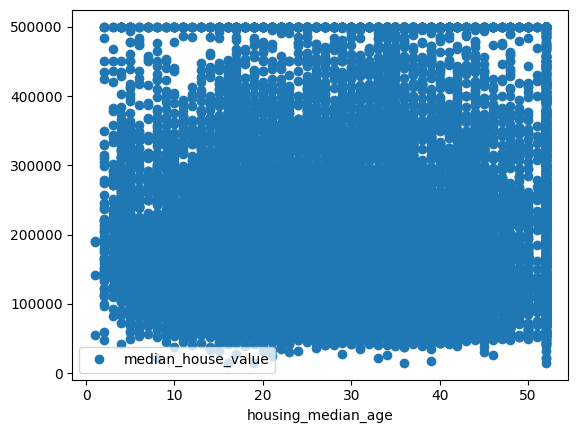

In [195]:
cali.plot(x = 'housing_median_age', y = 'median_house_value', style='o')

In [6]:
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df = cali.copy()
df = df.dropna()

In [190]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
for i in df['ocean_proximity'].unique():
    t = df.loc[df['ocean_proximity'] == i, 'median_house_value']
    print(i)
    print(t.describe())

NEAR BAY
count      2270.000000
mean     259279.292070
std      122853.742095
min       22500.000000
25%      162500.000000
50%      233800.000000
75%      346000.000000
max      500001.000000
Name: median_house_value, dtype: float64
<1H OCEAN
count      9034.000000
mean     240267.990812
std      106198.324980
min       17500.000000
25%      164300.000000
50%      215000.000000
75%      289475.000000
max      500001.000000
Name: median_house_value, dtype: float64
INLAND
count      6496.000000
mean     124896.863147
std       70057.955037
min       14999.000000
25%       77600.000000
50%      108700.000000
75%      149000.000000
max      500001.000000
Name: median_house_value, dtype: float64
NEAR OCEAN
count      2628.000000
mean     249042.355023
std      122548.010889
min       22500.000000
25%      150000.000000
50%      228750.000000
75%      322525.000000
max      500001.000000
Name: median_house_value, dtype: float64
ISLAND
count         5.000000
mean     380440.000000
std       

In [181]:
df.drop('ocean_proximity', axis = 1).corr()[['median_house_value']][:-1]

,median_house_value
longitude,-0.045398
latitude,-0.144638
housing_median_age,0.106432
total_rooms,0.133294
total_bedrooms,0.049686
population,-0.025300
households,0.064894
median_income,0.688355


Baseline for training data: 1.35e+10
Baseline for cross-validation data: 1.28e+10
Baseline for testing data: 1.34e+10
degree=1, train_mse=4.76e+09, crval_mse=4.57e+09
degree=2, train_mse=3.94e+09, crval_mse=4.09e+09
degree=3, train_mse=3.60e+09, crval_mse=5.49e+09


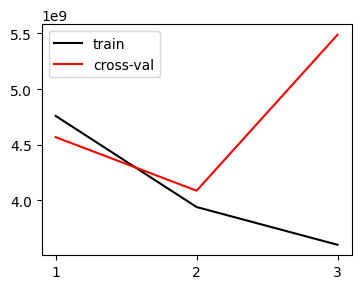

In [176]:
categorical_columns = ['ocean_proximity']
number_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

X = df.drop('median_house_value', axis = 1).copy()
y = df['median_house_value'].copy()

train_ratio = 0.60
crval_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio)
x_crval, x_test, y_crval, y_test = train_test_split(x_test, y_test, test_size = test_ratio / (test_ratio + crval_ratio))

baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_crval = np.ones(shape = y_crval.shape)*y_crval.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()

mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_crval = mean_squared_error(baseline_crval, y_crval)
mse_baseline_test = mean_squared_error(baseline_test, y_test)

print(f'Baseline for training data: {mse_baseline_train:.2e}')
print(f'Baseline for cross-validation data: {mse_baseline_crval:.2e}')
print(f'Baseline for testing data: {mse_baseline_test:.2e}')

train_mses = []
crval_mses = []
pipelines = []

degrees = range(1, 4)

for degree in degrees:
    pipeline = Pipeline([
        ('transformer', make_column_transformer(
                (OneHotEncoder(drop = 'if_binary'), categorical_columns),
                (PolynomialFeatures(include_bias = False, degree = degree), number_columns),
                remainder='passthrough'
            )
        ),
        ('linreg', LinearRegression())
    ])

    pipeline.fit(x_train, y_train)

    y_train_prediction = pipeline.predict(x_train)
    y_crval_prediction = pipeline.predict(x_crval)

    train_mse = mean_squared_error(y_train, y_train_prediction)
    crval_mse = mean_squared_error(y_crval, y_crval_prediction)
    
    print(f'degree={degree}, train_mse={train_mse:.2e}, crval_mse={crval_mse:.2e}')

    pipelines.append(pipeline)
    train_mses.append(train_mse)
    crval_mses.append(crval_mse)


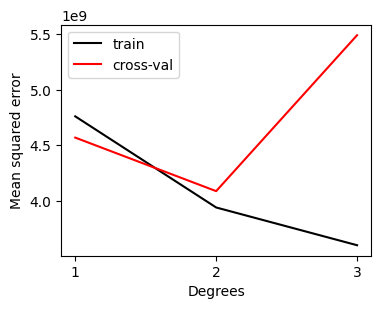

In [183]:
f, ax = plt.subplots(figsize=(4,3))
ax.plot(degrees, train_mses, c='k', label='train')
ax.plot(degrees, crval_mses, c='r', label='cross-val')
ax.set_xticks(degrees)
plt.ylabel('Mean squared error')
plt.xlabel('Degrees')
plt.legend()
plt.show()

In [189]:
y_test_prediction = pipelines[1].predict(x_test)

test_mse = mean_squared_error(y_test, y_test_prediction)

print(f'{test_mse:.2e}')
print(f'{np.sqrt(test_mse)}')

4.35e+09
65948.80419813354


In [177]:
result = permutation_importance(pipelines[1], x_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
features = x_test.columns
feature_importance_dict = {feature: importance for feature, importance in zip(features, importances)}
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance (Mean Decrease in Performance):")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

Feature Importance (Mean Decrease in Performance):
total_bedrooms: 2.498921378227369
latitude: 1.89759363714169
longitude: 1.8966538742833794
total_rooms: 1.1205974004575432
median_income: 0.8566602250996759
population: 0.7484002570394847
households: 0.28249412499296067
housing_median_age: 0.05833841955368505
ocean_proximity: 0.02113521273343656


In [178]:
pipelines[1].named_steps['transformer'].feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'], dtype=object)

In [184]:
r = permutation_importance(pipelines[1], x_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{pipelines[1].named_steps['transformer'].feature_names_in_[i]:<8}: "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        


total_bedrooms: 2.436 +/- 0.097
longitude: 1.906 +/- 0.040
latitude: 1.898 +/- 0.044
total_rooms: 1.114 +/- 0.058
median_income: 0.857 +/- 0.022
population: 0.742 +/- 0.055
households: 0.288 +/- 0.028
housing_median_age: 0.061 +/- 0.008
ocean_proximity: 0.020 +/- 0.001
